# STA 208: Homework 1 (Do not distribute)

## Due 4/10/19 midnight 

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Consider the binary classification setting where the training data is $x_i \in \mathbb R^p, y_i \in \{0,1\}, i=1,\ldots,n$ and recall the empirical risk (as a function of the predictor $g : \mathbb R^p \to \{0,1\}$),
$$
R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)),
$$
and the true risk is 
$$
R(g) = \mathbb E \ell(Y,g(X))
$$
where $X,Y$ are drawn from their joint distribution $f_{X,Y}(x,y)$.

1. Suppose that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.  What is the predictor that minimizes the True risk?  (Hint: derive an expression for this based on the joint distribution - you can use expressions involving conditional probabilities.)  This predictor is called the Bayes rule.
2. Suppose that we know that the Bayes rule can be written in the form, 
$$
h_j(x) = 1\{ x_j > 0 \}, 
$$
for some $j = 1,\ldots,p$, but we don't know which one.  Now using the empirical risk, what is a reasonable classification algorithm (Hint: you can think of finding a good classifier as a problem of finding $j$).  Describe the fit and predict methods. 
3. (Challenging) Suppose that I told you that for any fixed $j$ the following probability bound holds (from Hoeffding's inequality)
$$
\mathbb P \left\{ |R_n(h_j) - R(h_j)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
If $p=10$, how many samples would I need to get a classifier $\hat g$, from the previous question (part 2), such that 
$$
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} \ge 0.95.
$$
where $h$ is the Bayes rule, namely, the $h_j$ that minimizes $R$.
(Hint: use the union bound to show that $R_n(\hat g) \approx R(\hat g)$ and use the fact that $R_n(\hat g) \le R_n(h_j)$ for any $j$ because it is in the minimizer.)

1.1

denote $\eta(x) = P(y=1|x) = \int_{y=1} f(x,y)dy$

\begin{align}
R(1|x) &= P(y=0|x)\cdot 1+ P(y=1|x)\cdot 0 \\
     &= P(y=0|x)
\end{align}

\begin{align}
R(0|x) &= P(y=1|x)\cdot 1+ P(y=0|x)\cdot 0 \\
     &= P(y=1|x)
\end{align}

Bayes rule: 

if $R(1|x) \leq R(0|x)$, $g(x)=1$; otherwise $g(x)=0$

or 

if $P(y=0|x) \leq P(y=1|x)$, $g(x)=1$; otherwise $g(x)=0$

or

if $1-\eta(x) \leq \eta(x)$, i.e. $\eta(x) \geq \frac{1}{2}$, $g(x)=1$; otherwise $g(x)=0$


**proof**: $g^*(x) = \mathbf 1\{\eta(x)\geq \frac{1}{2}\}$ is the predictor that minimizes the True risk.

\begin{align}
R(g) &= \mathbb E \ell(Y,g(X)) \\
    &= P(Y \neq g(X) \\
    &= P(Y=0, g(X)=1) + P(Y=1, g(X) = 0) \\
    &= \mathbb E[\mathbb E[\mathbf 1(Y=0,g(X)=1|X=x) + \mathbf 1(Y=1,g(X)=0|X=x)]] \\
    &= \mathbb E[\mathbb E[\mathbf 1(g(X) = 1)(1-\eta(X)) + \mathbf 1(g(X)=0)\eta(X)]]
\end{align}


Since $R(g) - R(g^*) = \mathbb E[(1-2\eta(X))((\mathbf 1(g(X)=1) - \mathbf 1(g^*(X)=1))]$,

when $g^*(x)=1\{\eta(x)\geq \frac{1}{2}\}$, $R(g)-R(g^*)\geq 0$ will always be true.
    


1.2

$R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)) = \frac 1n \sum_{i=1}^n 1\{y_i \neq h_j(x_i)\} $
- fit: 

```
Rn = inf
ind = 0

for j in 1:p:
    temp = 0
    for i in 1:n:
        if x_ij > 0 && y_i == 0:
            temp += 1
        if x_ij < 0 && y_i == 1:
            temp += 1
     if temp < Rn:
         Rn = temp    # find the minimum Rn
         ind = j     # store the index
```

- predict: 

$g(x) = 1\{ x_{ind} > 0 \}, $

1.3

using the union bound: 

\begin{align}
&\mathbb P \left\{ \bigcup_{j=1}^p |R_n(h_j) - R(h_j)| > t \right\}\\
    &\le \sum_{j=1}^p \mathbb P \left\{ |R_n(h_j) - R(h_j)| > t \right\} \\
    &\le \sum_{j=1}^p 2 \exp \left( - 2 n t^2 \right)\\
    &= 2p \cdot \exp \left( - 2 n t^2 \right)
\end{align}

Since $R_n(\hat g) \le R_n(h_j)$, 

\begin{align}
R(\hat g) &\le R_n(h_j) - R_n(\hat g) + R(\hat g)\\
    &= R_n(h_j) - R_n(\hat g) + R(\hat g) - R(h_j) + R(h_j)\\
    &= R_n(h_j) - R(h_j) - R_n(\hat g) + R(\hat g)+ R(h_j) \\
    &\le |R(h_j) - R_n(h_j)| + |R(\hat g) - R_n(\hat g)| + R(h_j)\\
    &\le 2\ sup\ |R(h_j) - R_n(h_j)| + R(h_j)
\end{align}

i.e $\mathbb P \left\{|R(\hat g) - R(h)| > t \right\} \le 4p \cdot \exp \left( - 2 n t^2 \right) $

if $p = 10, t = 0.1, 4p\exp \left( - 2 n t^2 \right) = 0.05$

then $n = \lceil\frac{log(0.05/4p)}{(-2)t^2}\rceil= \lceil 334.2306 \rceil = 335$


__Exercise 2__ (20 pts)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that both linear regression and k-nearest neighbors can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$), assuming that $p < n$ and $X$ is full rank.  Give an expression for $H$ or an algorithm for computing $H$.  Assume that the KNN algorithm will use the same point as its own nearest neighbor (this is consistent with what you get if you use the same dataset in fit and predict in sklearn.)  You can just write it in words or pseudocode. 
2. Give a simple modification to your algorithm to compute the KNN's $H$ matrix so that a sample does not use its own point.  Derive an expression for the leave-one-out cross validated squared error based on this $H$. You can just write it in words or pseudocode. 
3. For linear regression (with $p < n$ and $X$ is full rank), let $X = U D V^\top$ be the singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.  Describe a fit method that precomputes these quantities separately, and describe a predict method.


4. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values, and only the first $r$ columns of $U,V$ would be used.  Let $U_r, V_r$ be the $n \times r$ and $p \times r$ eigenvector matrices.  Call the new $r \times r$ matrix $D_r$ ($r < p$) which just has the top $r$ singular values.  Then the new coefficient vector is the OLS computed as if the design matrix is modified by $X \gets U_r D_r V_r^\top$.  Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?  What is its computational complexity (it should not depend on n)?

2.1
- For linear regression: 
    $$ \hat \beta = argmin\ (y - X\beta)^T(y-X\beta) = (X^\top X)^{-1} X^T y $$
    $$ \hat y = X \hat \beta = X(X^TX)^{-1}X^T y$$
    So $ H = X(X^TX)^{-1}X^T$


- For k-nearest neighbors: 

    Since $ \hat y_i = \frac{1}{K} \sum_{k = 1}^K y_{i_k} $, H can be computed as below
    
    ```python
    H = {h_ij}, where h_ij = 0 for i = 1,...n,j=1,...,n
    for i in 1:n :
        for j in 1:n :
            compute distance d(x_i, x_j)
        sort distances 
        get K-nearest neighbors of x_i (i_1, i_2, ..., i_k)
        for k in 1:K :
            let h_{i, i_k} = 1/K
            
    ```

2.2

```python
    H = {h_ij}, where h_ij = 0 for i = 1,...n,j=1,...,n
    for i in 1:n :
        for j in 1:n :
            if i != j:
               compute distance d(x_i, x_j)
        sort distances 
        get K-nearest neighbors of x_i (i_1, i_2, ..., i_k)
        for k in 1:K :
            let h_{i, i_k} = 1/K
            
```
$ error = \frac{1}{n}(y-Hy)^T (y-Hy) $ 

2.3

Since $ X = UDV^T $, where $D$ is diagnal, $ U^TU = I$, $ VV^T = I$ 

\begin{align} 
\hat \beta &= (X^\top X)^{-1} X^T y \\
        &= (VDU^T UDV^T)^{-1} VDU^T y \\
        &= (VDDV^T)^{-1} VDU^T y \\
        &= (VD^2V^T)^{-1} VDU^T y \\
        &= (D^2VV^T)^{-1} VDU^T y\ \ (D^2\ is\ p*p\ diagnal,\ commutative)\\ 
        &= D^{-2} VDU^T y \\
        &= VD^{-2}DU^T y \\
        &= VD^{-1}U^T y
\end{align}

Let $A = VD^{-1}$, $b = U^T y$, then $\hat \beta = Ab$

$U$ and $V^T$ are matrices with eigenvectors chosen from $XX^T$ and $X^TX$, $D$ is a diagnal matrix with p elements equal to the root of the eigenvalues of $XX^T$ or $X^TX$.

predict: $ \hat y = X\hat\beta =  XVD^{-1}U^T y$

2.4

$ A = V_rD_r^{-1} = \sum_{j = 1}^r V_j D_{r_j}^{-1}$, 

where $V_j$ is the jth column of $V$, $D_{r_j}^{-1}$ is the jth row of $D_r^{-1}$ 

The computational complexity is $O(pr^2)$.

__Exercise 3__ (30 pts)

We call the method that zeros out all but $r$ largest singular values in OLS, singular value regression.  Implement the singular value regressor as a sklearn style class below.  Test it by simulating the training and test data from the `gen_LR_data` function below and calculate the average square error on the test set.  Do this for each choice of `r` in the fit function (from 1 to $p$).

In [1]:
import numpy as np
from scipy.linalg import svd

In [2]:
class SingularValueRegressor:
    """
    : A regression object that uses the SVD to fit and predict
    : Init: specify rank r
    : .fit: solve the SVD of X and precompute beta
    : .predict: Return y hat for X_test
    """
    
    def __init__(self,r):
        """
        : Store the rank
        """
        self.r = r
        
    def fit(self,X,y):
        """
        : Computes and stores the SVD (use scipy.linalg.svd)
        : Computes beta for rank r singular value regression
        """
        self.U, self.d, self.Vt = svd(X, full_matrices=False)
        self.b = self.U.T @ y
        self.beta = self.Vt[0:self.r,:].T @ np.diag(1/self.d[0:self.r]) @ self.b[0:self.r]
         
    def predict(self,X_test):
        """
        : Outputs the predicted y given the predictors X_test
        """
        return X_test @ self.beta 
    
    def change_rank(self,r):
        """
        : Assumes that the SVD has been computed and uses it to change the rank; after
        : running the new regressor object should be as if we fit with the new rank r
        """
        self.r = r
        A = self.Vt[0:self.r,:].T @ np.diag(1/self.d[0:self.r])
        self.beta = A @ self.b[0:self.r]

In [3]:
def gen_LR_data(r = 10, p = 20, n = 100):
    """
    : generate data from an approx low rank regression model
    """
    alpha = np.random.chisquare(1,size = (p,r)) #X coefficients
    Z = np.random.normal(size=(n,r)) #X covariates
    beta = np.random.normal(size = r) #reg covs
    mu = Z @ beta #hidden mean
    Xmean = Z @ alpha.T #random transformation of Z
    X = Xmean + np.random.normal(0,.5,size=(n,p)) #add noise - not exactly low rank
    X_test = Xmean + np.random.normal(0,.5,size=(n,p))
    y = mu + np.random.normal(0,1,size=(n))
    y_test = mu + np.random.normal(0,1,size=(n))
    return (X,y,X_test,y_test)

In [4]:
X,y,X_test,y_test = gen_LR_data()

In [5]:
p = X.shape[1]
svr = SingularValueRegressor(p)
svr.fit(X, y)

avg_sq_error = []

for r in range(p):
    svr.change_rank(r+1)
    pred_y = svr.predict(X_test)
    avg_sq_error.append(np.mean((pred_y - y_test)**2))
    

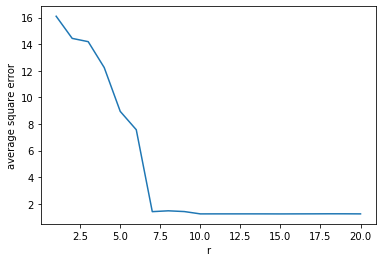

In [7]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(p))+1, avg_sq_error)
plt.xlabel('r')
plt.ylabel('average square error')
plt.show()

__Exercise 4__ (30 pts)

The dataset in the hw1 directory has a Y variable, 7 predictor variables (X1 - X7).  Using sklearn and the class that you constructed above, compare ridge regression, OLS, kNN, and SingularValueRegressor.  Compare and tune the methods using appropriate testing procedures.  Comment on the tuning of each parameter in ridge, kNN, and SingularValueRegressor in markdown.  Be sure to standardize the X variables first and decide how to deal with NAs.  

In [8]:
import pandas as pd

In [9]:
data_mat = pd.read_csv('hw1/hw1_data.csv')
data_mat.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


Some notes for the NAs, you need to replace the NAs somehow to use these methods.  The SimpleImputer will replace the NAs with the mean,median, etc.  You can fit this on the training data and use this to transform for the test set.  We can see that any imputer that is fit only on the training set also can give you that the test error is an unbiased risk estimator.  Let $\hat I$ be the imputer transform and $\hat f$ be any trained predictor.

$$\hat I: R^p \to R^{p}$$
$$\hat f: R^{p} \to R$$

For example,
$(\hat I(x))_j = $ $x_j$ if non-missing and $\hat \mu_j$ if missing 
or you could add a missingness indicator,
$$\hat I_2: R^p \to R^{2p}$$

$(\hat I_2(x))_j = $ $x_j$ if non-missing and $\hat \mu_j$ if missing for $j =1,\ldots,p$

$(\hat I_2(x))_{p+j} = $ $0$ if non-missing and $1$ if missing for $j =1,\ldots,p$

The trained predictor could be linear,
ex. $\hat f(\hat I(x)) = \hat I(x)^\top \hat \beta$

Then we can combine these steps into one predictor,
$\hat g(x) = \hat f (\hat I (x))$.

The test error is still an unbiased risk estimator,
$$\frac{1}{n_t} \sum_{i=n_0+1}^{n_0+n_t} (y_i - \hat g(x_i))^2.$$

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

- There are 6 missing values in the data set. 
- I first split the data set into training set and testing set, where the proportion of the testing set is 33%. 
- Then I standardize the X variables, and impute missing values with the mean along each column.

Here I use mean square error as the comparing metric. According to the mean square error on the testing data set, **KNN is the best model**. The details are shown as below.

In [11]:
## missing values
data_mat.isnull().sum()

Y     0
X1    0
X2    0
X3    6
X4    0
X5    0
X6    0
X7    0
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_mat.iloc[:, 1:], 
                                                    data_mat.iloc[:, 0],
                                                    test_size = 0.33,
                                                    random_state = 12)

In [13]:
# standardize
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# replace the NAs with the mean
imp = SimpleImputer(strategy='mean')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

1. OLS

The mean square error for linear regression is shown as below.

In [14]:
## OLS
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("The mean square error is %f" % mean_squared_error(y_test, y_pred))

The mean square error is 10.672925


In [15]:
def get_mse(model, X_test, y_test, pars, par_name):
    """ Get mean square error on testing data set for a list of regression models
    Args： 
        models: A list of models
        X_test: Testing X
        y_test: Test Y
        pars: A list of values for the tuning parameter
        par_name: Name of the tuning parameter
        
    Returns:
        The model with the minimum mean square error
    """
    mse = []
    
    for m in model:
        y_pred = m.predict(X_test)
        mse.append(mean_squared_error(y_test, y_pred))
        
    ind = plot_mse(mse, pars, par_name)
    
    return model[ind]

In [16]:
def plot_mse(mse, pars, par_name):
    """ Plot mean square error for a list of regression models
    Args： 
        mse: A list of MSE
        pars: A list of values for the tuning parameter
        par_name: Name of the tuning parameter
        
    Returns:
        The index for the model with the minimum mean square error
    """
    plt.plot(pars, mse)
    plt.xlim([pars.min(), pars.max()])
    plt.ylabel("Mean Squared Error")
    plt.xlabel(par_name)
    
    ind = np.argmin(mse)
    best_par = pars[ind]
    print("The minimum mean square error is %f, with %s equals to %f" % (mse[ind], par_name, best_par))
    return ind

2. Ridge Regression

I set a list of alphas ranging from -5 to 10. It can be seen that when alpha is set to 4.309309, the mean square error is the smallest.

The minimum mean square error is 10.599689, with alpha equals to 4.309309


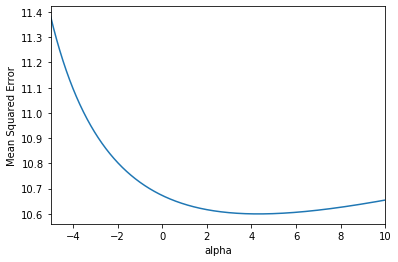

In [17]:
## ridge
ridge = []
alphas = np.linspace(-5, 10, 1000)
for a in alphas:
    rdg = Ridge(alpha=a)
    rdg.fit(X_train, y_train)
    ridge.append(rdg)

best_ridge = get_mse(ridge, X_test, y_test, alphas, "alpha")

3. KNN

The tuning parameter for KNN is the number of neighbors to use, which is ranging from 1 to n here. 

It can be seen that when k is set to 7, the mean square error is the smallest.

The minimum mean square error is 7.685669, with k equals to 7.000000


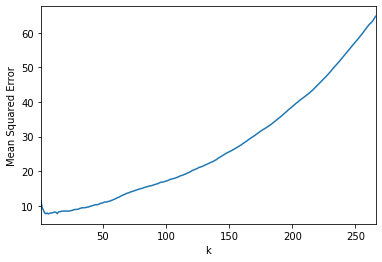

In [18]:
## knn
n = X_train.shape[0]
knns = []
for k in range(n):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    knn.fit(X_train, y_train)
    knns.append(knn)

best_knn = get_mse(knns,X_test, y_test, np.array(range(n))+1, "k" )

4. SingularValueRegressor

The tuning parameter for singular value regressor is the number of r, which is ranging from 1 to p here. 

Here I add the intecept column to the design matrix. Then fit the SingularValueRegressor.

It can be seen that when r is set to 8, the mean square error is the smallest.

In [19]:
def add_intercept(m):
    row, col = m.shape
    one = np.ones((row, 1))
    return np.hstack((one, m))

The minimum mean square error is 10.672925, with r equals to 8.000000


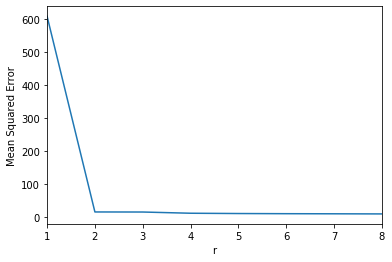

In [20]:
## svr
p = X_train.shape[1]
svr = SingularValueRegressor(p+1)
svr.fit(add_intercept(X_train), y_train)

mse_svr = []
for r in range(p+1):
    svr.change_rank(r+1)
    y_pred = svr.predict(add_intercept(X_test))
    mse_svr.append(mean_squared_error(y_test, y_pred))
    
_ = plot_mse(mse_svr, np.array(range(p+1))+1, "r")

In [21]:
mse_svr

[609.4242461912253,
 16.60340238335489,
 16.40086555585168,
 12.722755656693497,
 11.83529372947425,
 11.34869445977006,
 11.052142715733867,
 10.672924520698816]